In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

In [2]:
from problem import Fokker_Planck_1d
from model import PDE_basis, TrainLS
from my_utils import plot_2d_tri, plot_domain_2d

***************************************************
Fokker_Planck (case=1):
	x_pde:   	(10000, 2)
	x_bd:    	(2998, 2)
	x_ic:    	None
	x_test:    	(14652, 2)
***************************************************
pde rmse: 9.878446169606847e-17


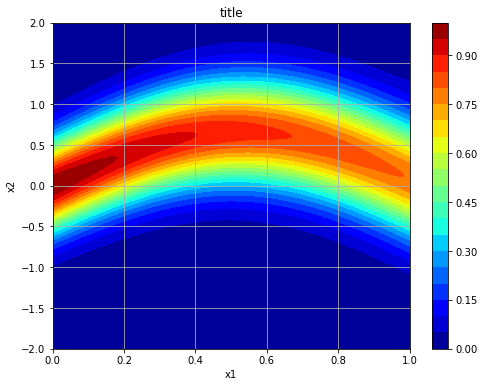

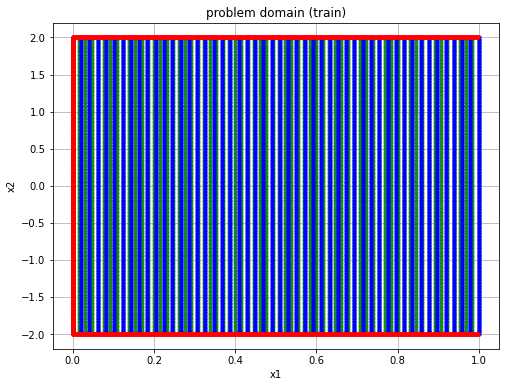

In [3]:
data = np.load('data/data.npz',allow_pickle=True)
my_prob = Fokker_Planck_1d(case=1, data=data)
print(my_prob)
x,u = my_prob.check_solution()
plot_2d_tri(x[:,0], x[:,1], u[:,0], equal_ratio=False)

plot_domain_2d(x_pde=my_prob.x_pde, x_bd=my_prob.x_bd, x_test=my_prob.x_test )


In [4]:
basis_num_vec = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
shape_vec = [1, 1, 1, 1.5, 1.5,  1.5, 2, 2, 2, 2]
print(len(shape_vec))
print(len(basis_num_vec))
weight = {'pde':1, 'bd_u':10}

10
10


In [5]:
temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_pde_basis(shape=shape_vec[i], radius=1.5)
    # basis.init_gaussian()
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=weight,ls_mse=True,item_mse=False)

    # mse_test, info2 = train_ls.get_mse_data(x_in=my_prob.x_test, y_true=my_prob.target_test['u'],
    #                                         coef=coef_sol['u'], basis=basis)
    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)
    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)
mse_pde = np.array(temp_mse)

0 Test MSE: 0.00022285546556136368
1 Test MSE: 9.716103851610358e-07
2 Test MSE: 9.023021813915604e-08
3 Test MSE: 3.353325661484381e-10
4 Test MSE: 8.91101845334246e-12
5 Test MSE: 3.368167235909367e-12
6 Test MSE: 1.2259857478591372e-14
7 Test MSE: 2.2734901834078264e-15
8 Test MSE: 6.661917828003568e-16
9 Test MSE: 1.7067277986920616e-16


In [6]:
# basis.init_dnn(init_type='default')


temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_dnn(init_type='default')
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)

    # mse_test, info2 = train_ls.get_mse_data(x_in=my_prob.x_test, y_true=my_prob.target_test['u'],
    #                                         coef=coef_sol['u'], basis=basis)
    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)
    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)


#
mse_dnn_default = np.array(temp_mse)

0 Test MSE: 0.0006673639381798972
1 Test MSE: 7.2834969234188e-05
2 Test MSE: 3.970945142244277e-05
3 Test MSE: 2.867800622321893e-05
4 Test MSE: 2.5869104894795092e-05
5 Test MSE: 2.393118666415346e-05
6 Test MSE: 2.0657411677667662e-05
7 Test MSE: 2.4701565954702617e-05
8 Test MSE: 1.4998999858924487e-05
9 Test MSE: 2.1665994486852755e-05


In [7]:
df = pd.DataFrame({'basis_num': basis_num_vec,
                   'mse_dnn_default': mse_dnn_default,
                   'mse_pde_basis': mse_pde})
df.to_csv(f'ls.csv',header=True, index=False, encoding='utf-8')


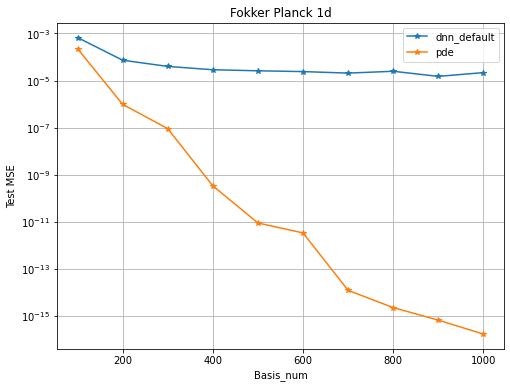

In [8]:
plt.figure(figsize=(8,6))
plt.plot(basis_num_vec, mse_dnn_default,'*-' ,label='dnn_default')
plt.plot(basis_num_vec, mse_pde,'*-', label='pde')
plt.yscale('log')
plt.legend()
plt.title('Fokker Planck 1d')
plt.grid(which='both')
plt.xlabel('Basis_num')
plt.ylabel('Test MSE')
plt.show()